# Example 09: Ask Gemini Analysis

In [ ]:
############################################################################

# Created by: Prof. Valdecy Pereira, D.Sc.
# UFF - Universidade Federal Fluminense (Brazil)
# email:  valdecy.pereira@gmail.com
# pyBibX - A Bibliometric and Scientometric Library
# Example - Gemini Analysis

# Citation:
# PEREIRA, V.; BASILIO, M.P.; SANTOS, C.H.T. (2025). PyBibX: A Python Library for Bibliometric and
# Scientometric Analysis Powered with Artificial Intelligence Tools. Data Technologies and Applications.
# Vol. ahead-of-print No. ahead-of-print. doi: https://doi.org/10.1108/DTA-08-2023-0461

############################################################################

In [ ]:
# Restart the session afther this cell to avoid Google Colab errors
!pip install --upgrade --force-reinstall numpy==1.26.4 pandas

In [ ]:
!pip install pybibx
!pip install tabulate

In [ ]:
# Dowload .bib file
!wget https://github.com/Valdecy/pyBibX/raw/main/assets/bibs/scopus.bib

In [ ]:
# Required Libraries
import textwrap

from pybibx.base import pbx_probe
from tabulate import tabulate

In [ ]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'scopus.bib'
database  = 'scopus'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 261 Documents were Found ( 263 Documents and 2 Duplicates )

Article = 179
Article in Press = 1
Book Chapter = 12
Conference Paper = 64
Conference Review = 3
Review = 2


In [ ]:
# Health Analysis
health = bibfile.health_bib()

# Check Health
health

,Entries,Completeness (%),Number of Docs
0,Sources,99.62%,260
1,Abstracts,99.62%,260
2,Affiliation,100.00%,261
3,Author(s),97.70%,255
4,DOI,90.04%,235
5,Keywords - Authors,86.97%,227
6,Keywords - Plus,67.05%,175
7,References,96.93%,253
8,Year,100.00%,261


In [ ]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

,Main Information,Results
0,Timespan,1998-2022
1,Total Number of Countries,34
2,Total Number of Institutions,314
3,Total Number of Sources,156
4,Total Number of References,8535
5,Total Number of Languages,6
6,--croatian (# of docs),1
7,--english (# of docs),252
8,--english; lithuanian (# of docs),1
9,--french (# of docs),2


In [ ]:
# The metadata can be reviewed and manually modified. If you need to make adjustments, you can directly edit the bibfile.data,
# which is a DataFrame containing all the utilized information.
print(tabulate(bibfile.data.head(n = 10), headers = 'keys', tablefmt = 'psql'))
# Modify 'bibfile.data' as needed.

+----+---------------------------------------------+------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Gemini - EDA Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_eda(char_limit  = 27000,
                                   model      = 'gemini-1.5-flash',
                                   api_key    = 'your_api_key_here',
                                   query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 1125
This data provides a snapshot of a research corpus compiled between 1998 and 2022.  Here are some key insights:  **Overall Productivity & Scope:**  * **Moderate Size:** The corpus is of moderate size, encompassing 261 documents from 314 institutions
across 34 countries. This suggests a focused area of research rather than a broad, sprawling field. * **English Dominance:** The overwhelming majority of documents are in English (252 out of 261), indicating an international, primarily English-
speaking research community.  The presence of other languages suggests some regional or national variations in research output. * **Steady Publication Rate:** The average of 10.44 documents per year suggests a relatively consistent publication rate
throughout the 25-year period.  Further analysis could reveal trends over time. * **High Citation Rate:** The average of 22.46 citations per document is relatively high, suggesting the research is impactful and well-cited within 

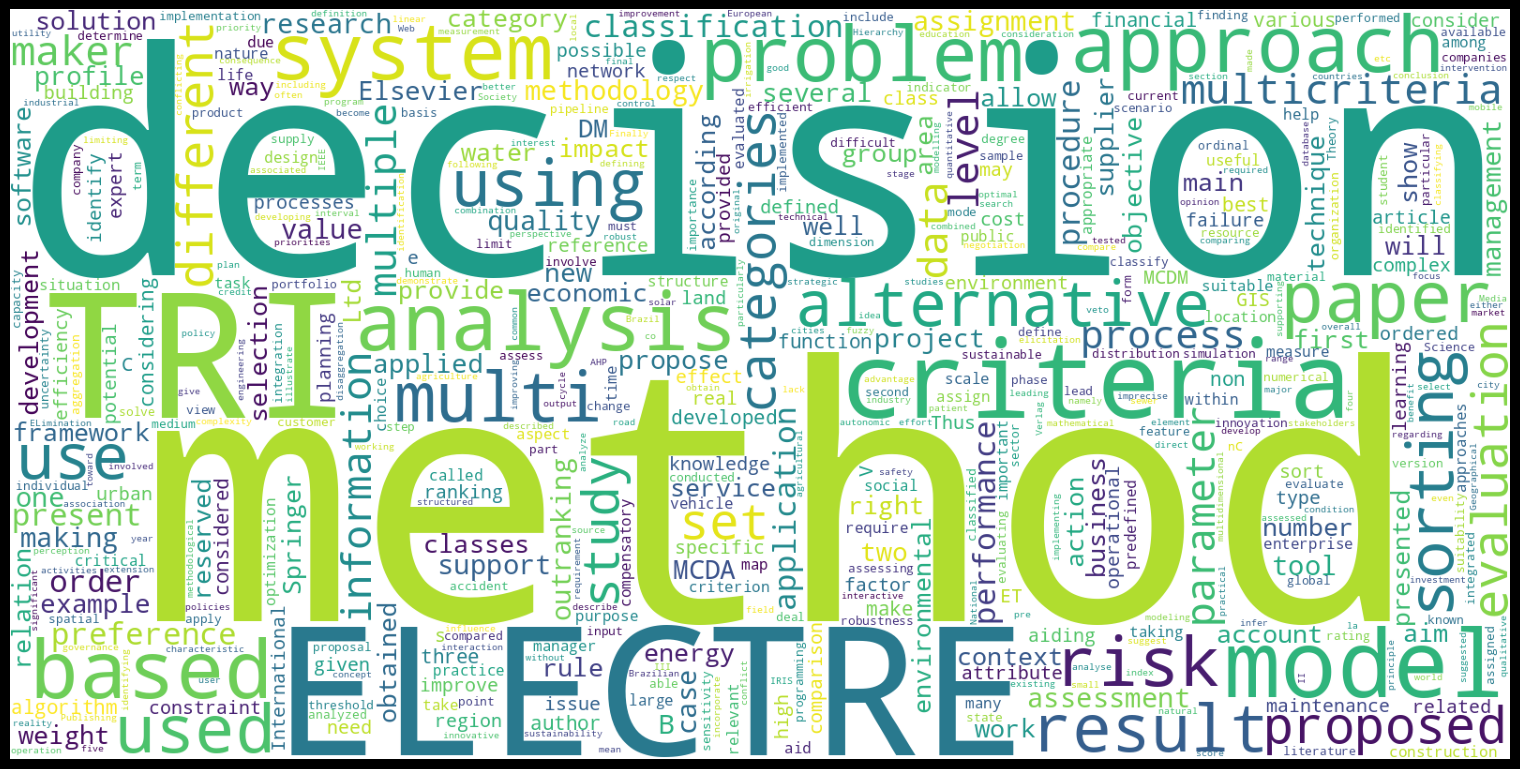

In [ ]:
# WordCloud from the Abstracts, Title, Authors Keywords or Keywords Plus
# Arguments: entry             = 'abs', 'title', 'kwa', or 'kwp'
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500, rmv_custom_words = [])

In [ ]:
# Gemini - Wordcloud Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_wordcloud(char_limit = 27000,
                                         model      = 'gemini-1.5-flash',
                                         api_key    = 'your_api_key_here',
                                         query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 8704
This word frequency data suggests the text focuses on **multi-criteria decision analysis (MCDA)**, specifically using outranking methods like ELECTRE and TRI.  Here's a breakdown of insights:  **Core Topic:** The high frequency of "method,"
"decision," "ELECTRE," "TRI," "criteria," "model," and "multicriteria" strongly indicates a paper or document describing and potentially comparing different MCDA methods, with a focus on outranking approaches.  The presence of "MCDM" (Multi-Criteria
Decision Making) further confirms this.  **Methodology and Application:** The text likely details a specific methodology ("approach," "process," "procedure," "methodology") applied to a real-world problem ("problem," "application," "case"). The words
"alternative," "sorting," "ranking," and "evaluation" highlight the comparative nature of the analysis, selecting the best option from a set of alternatives.  The presence of "assessment" and "performance" suggests the evaluation o

In [ ]:
# N-Grams
# Arguments: view       = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry      = 'abs', 'title', 'kwa', or 'kwp'
#            n_grams    = An integer with size n (representing the most common groups of words with size n)
#            stop_words = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                         'ar' = Arabic;   'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech;    'en' = English; 'fi'    = Finnish;             'fr' = French;   'de' = German;  'el' = Greek;    'he' = Hebrew; 'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                         'ja' = Japanese; 'ko' = Korean;  'mr' =  Marathi;  'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                         'zh' = Chinese;  'th' = Thai;    'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus
#            wordsn            = Number of N-Grams
bibfile.get_top_ngrams(view = 'notebook', entry = 'kwp', ngrams = 3, stop_words = [], rmv_custom_words = [], wordsn = 15)

In [ ]:
# Gemini - N-Grams Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_ngrams( char_limit = 27000,
                                      model      = 'gemini-1.5-flash',
                                      api_key    = 'your_api_key_here',
                                      query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 504
This word frequency data suggests a strong focus on **Multi-Criteria Decision Analysis (MCDA)** and its related fields within the analyzed text corpus.  Here's a breakdown of insights:  * **Dominant Theme: Multi-Criteria Decision Making:** The high
frequency of terms like "multi criteria decision," "multiple criteria decision," "multi criteria analysis," and "multiple criteria analysis" clearly indicates MCDA as the central topic.  The variations in spelling ("multi" vs "multiple") suggest the
text might come from diverse sources.  * **Decision Support Systems (DSS) as a Key Tool:**  The frequent appearance of "decision support systems" and its variations suggests that the corpus extensively discusses the use of DSS in the context of MCDA.
The combination of "decision support systems" and "multi criteria decision" highlights the application of DSS technology for solving complex MCDA problems.  * **Emphasis on Criteria:** The repeated presence of "criteria" in 

In [ ]:
# Evolution Plot

# Arguments: view              = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            key               = 'abs', 'title', 'jou, 'kwa', or 'kwp';
#            stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                                'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                                'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                                'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainian
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            topn              = Total number entities;
#            txt_font_size     = Font size of the text inside the bins;
#            start             = Start Year; -1 = all years
#            end               = End Year;   -1 = all years
bibfile.plot_evolution_year(view             = 'notebook',
                            stop_words       = ['en'],
                            rmv_custom_words = [],
                            key              = 'abs',
                            topn             = 10,
                            txt_font_size    = 12,
                            start            = 2010,
                            end              = 2021)

In [ ]:
# Gemini - Evolution Plot Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_ep( char_limit = 27000,
                                  model      = 'gemini-1.5-flash',
                                  api_key    = 'your_api_key_here',
                                  query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 1682
This data shows the frequency of keywords in publications related to decision-making methods, likely in the field of operational research or similar.  Here are some key insights:  * **Dominant Methods:**  `ELECTRE` and `TRI` consistently rank as the
most frequently used methods across all years.  This suggests these are prominent techniques for multi-criteria decision analysis (MCDA).  Their consistent high frequency points towards their enduring relevance and widespread application.  *
**Consistent Themes:** Keywords like `decision`, `method`, `criteria`, and `paper` appear consistently throughout, reflecting the core focus of the research area.  `Analysis` and `approach` also feature prominently, indicating a focus on both
methodological development and application studies.  * **Trend towards Multi-Criteria:** The increase in frequency of terms like `multi`, `multiple`, and the persistent high usage of `criteria` suggests a growing focus on problems involvi

In [ ]:
# Sankey Diagram (An interactive plot)
# Arguments: view  = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            entry = a list of any length of the following keys -> 'aut', 'cout', 'inst', 'jou', 'kwa', 'kwp', 'lan';
#            topn  = Total number entities
bibfile.sankey_diagram(view = 'notebook', entry = ['aut', 'cout', 'inst', 'lan'], topn = 10)

# PS: The white bars can be dragged

In [ ]:
# Gemini - Sankey Diagram Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_sankey( char_limit = 27000,
                                      model      = 'gemini-1.5-flash',
                                      api_key    = 'your_api_key_here',
                                      query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 1087
This data represents a network graph, showing connections between nodes (individuals and institutions) with weighted edges representing the strength of the connection.  Several insights can be drawn:  **Strongest Connections:**  * **Portugal and
Brazil dominate the network:**  Many of the strongest connections involve individuals and institutions from Portugal and Brazil.  This suggests a significant research or collaborative relationship between these two countries. * **Strong individual
connections:**  The top connections are largely between individuals (`mousseau`, `dias`, etc.), indicating strong personal collaborations. * **Institution-Institution ties:** The connections between `ceg-ist` and `faculty of economics` (both in
Portugal, with strong english counterparts) show strong institutional partnerships.  **Geographic and Institutional Clustering:**  * **National Clusters:** The data reveals distinct national clusters, with strong internal connections 

In [ ]:
# Authors Productivity Plot (An interactive plot). It informs for each year the documents (IDs) published for each author
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            topn = Total number entities
bibfile.authors_productivity(view = 'notebook', topn = 20)

In [ ]:
# Gemini -  Authors Productivity Plot, Countries Productivity Plot, Institutions Productivity Plot or Sources Productivity Plot Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
#            entry       = 'aut', 'cout', 'inst', or 'jou' # Run first the correspondent Productivity Plot before begin the analysis
analysis = bibfile.ask_gemini_ap( char_limit = 27000,
                                  model      = 'gemini-1.5-flash',
                                  api_key    = 'your_api_key_here',
                                  query      = 'give me insights about the following information',
                                  entry      = 'aut')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 2609
This data shows the publication output of several authors, likely in a specific field (possibly decision-making or a related area given some of the names), over a period of several years (roughly 1998-2022).  Here are some insights:  * **Publication
Bursts:** Several authors show periods of increased publication activity. For example, Mousseau exhibits a peak around 2011-2012, Figueira shows a later peak from 2019-2021, and Certa has a significant increase in 2021. This could reflect research
grants, collaborations, or shifts in research focus.  Conversely, some authors maintain a consistently low publication rate.  * **Career Trajectories:**  The data hints at different career trajectories. Mousseau's publications begin earlier and taper
off, suggesting an established career possibly moving into other roles.  In contrast, Figueira and several others show a more recent increase in publication, possibly indicating a rising career or a sustained period of high 

In [ ]:
# Bar Plots
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#                    statistic = 'dpy', 'cpy', 'ppy', 'ltk', 'spd', 'spc', 'apd', 'apc', 'aph', 'bdf_1', 'bdf_2', 'bdf_3', 'ipd', 'ipc', 'cpd', 'cpc', 'lpd', 'kpd', 'kad'
#                        'dpy' = Documents per Year
#                         cpy' = Citations per Year
#                        'ppy' = Past Citations per Year
#                        'ltk' = Lotka's Law
#                        'spd' = Sources per Documents
#                        'spc' = Sources per Citations
#                        'apd' = Authors per Documents
#                        'apc' = Authors per Citations
#                        'aph' = Authors per H-Index
#                        'bdf_1', 'bdf_2', 'bdf_3' = Bradford's Law - Core Sources 1, 2 or 3
#                        'ipd' = Institutions per Documents
#                        'ipc' = Institutions per Citations
#                        'cpd' = Countries per Documents
#                        'cpc' = Countries per Citations
#                        'lpd' = Language per Documents
#                        'kpd' = Keywords Plus per Documents
#                        'kad' = Authors' Keywords per Documents
#                         topn = Total number entities
bibfile.plot_bars(view = 'notebook', statistic = 'apd', topn = 20)

In [ ]:
# Gemini -  Bar Plot Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_bp( char_limit = 27000,
                                  model      = 'gemini-1.5-flash',
                                  api_key    = 'your_api_key_here',
                                  query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 638
The data shows a clear power-law distribution, typical of authorship in many fields.  A small number of authors are responsible for a disproportionately large share of the documents.  Here are some insights:  * **High Concentration of Authorship:**
The top three authors (Mousseau, Figueira, Dias) account for 57 out of 117 total documents (almost half). This suggests a very concentrated research area or collaboration network.  The majority of publications are generated by a relatively small
group of prolific researchers.  * **Possible Collaboration Clusters:**  The presence of multiple authors with similar numbers of publications (e.g., the group with 6 publications each) hints at potential research groups or collaborations working on
similar themes.  Investigating the subjects of their publications would clarify this.  * **"Unknown" Author:** The presence of six "unknown" documents warrants further investigation.  This could represent missing data, anonymized 

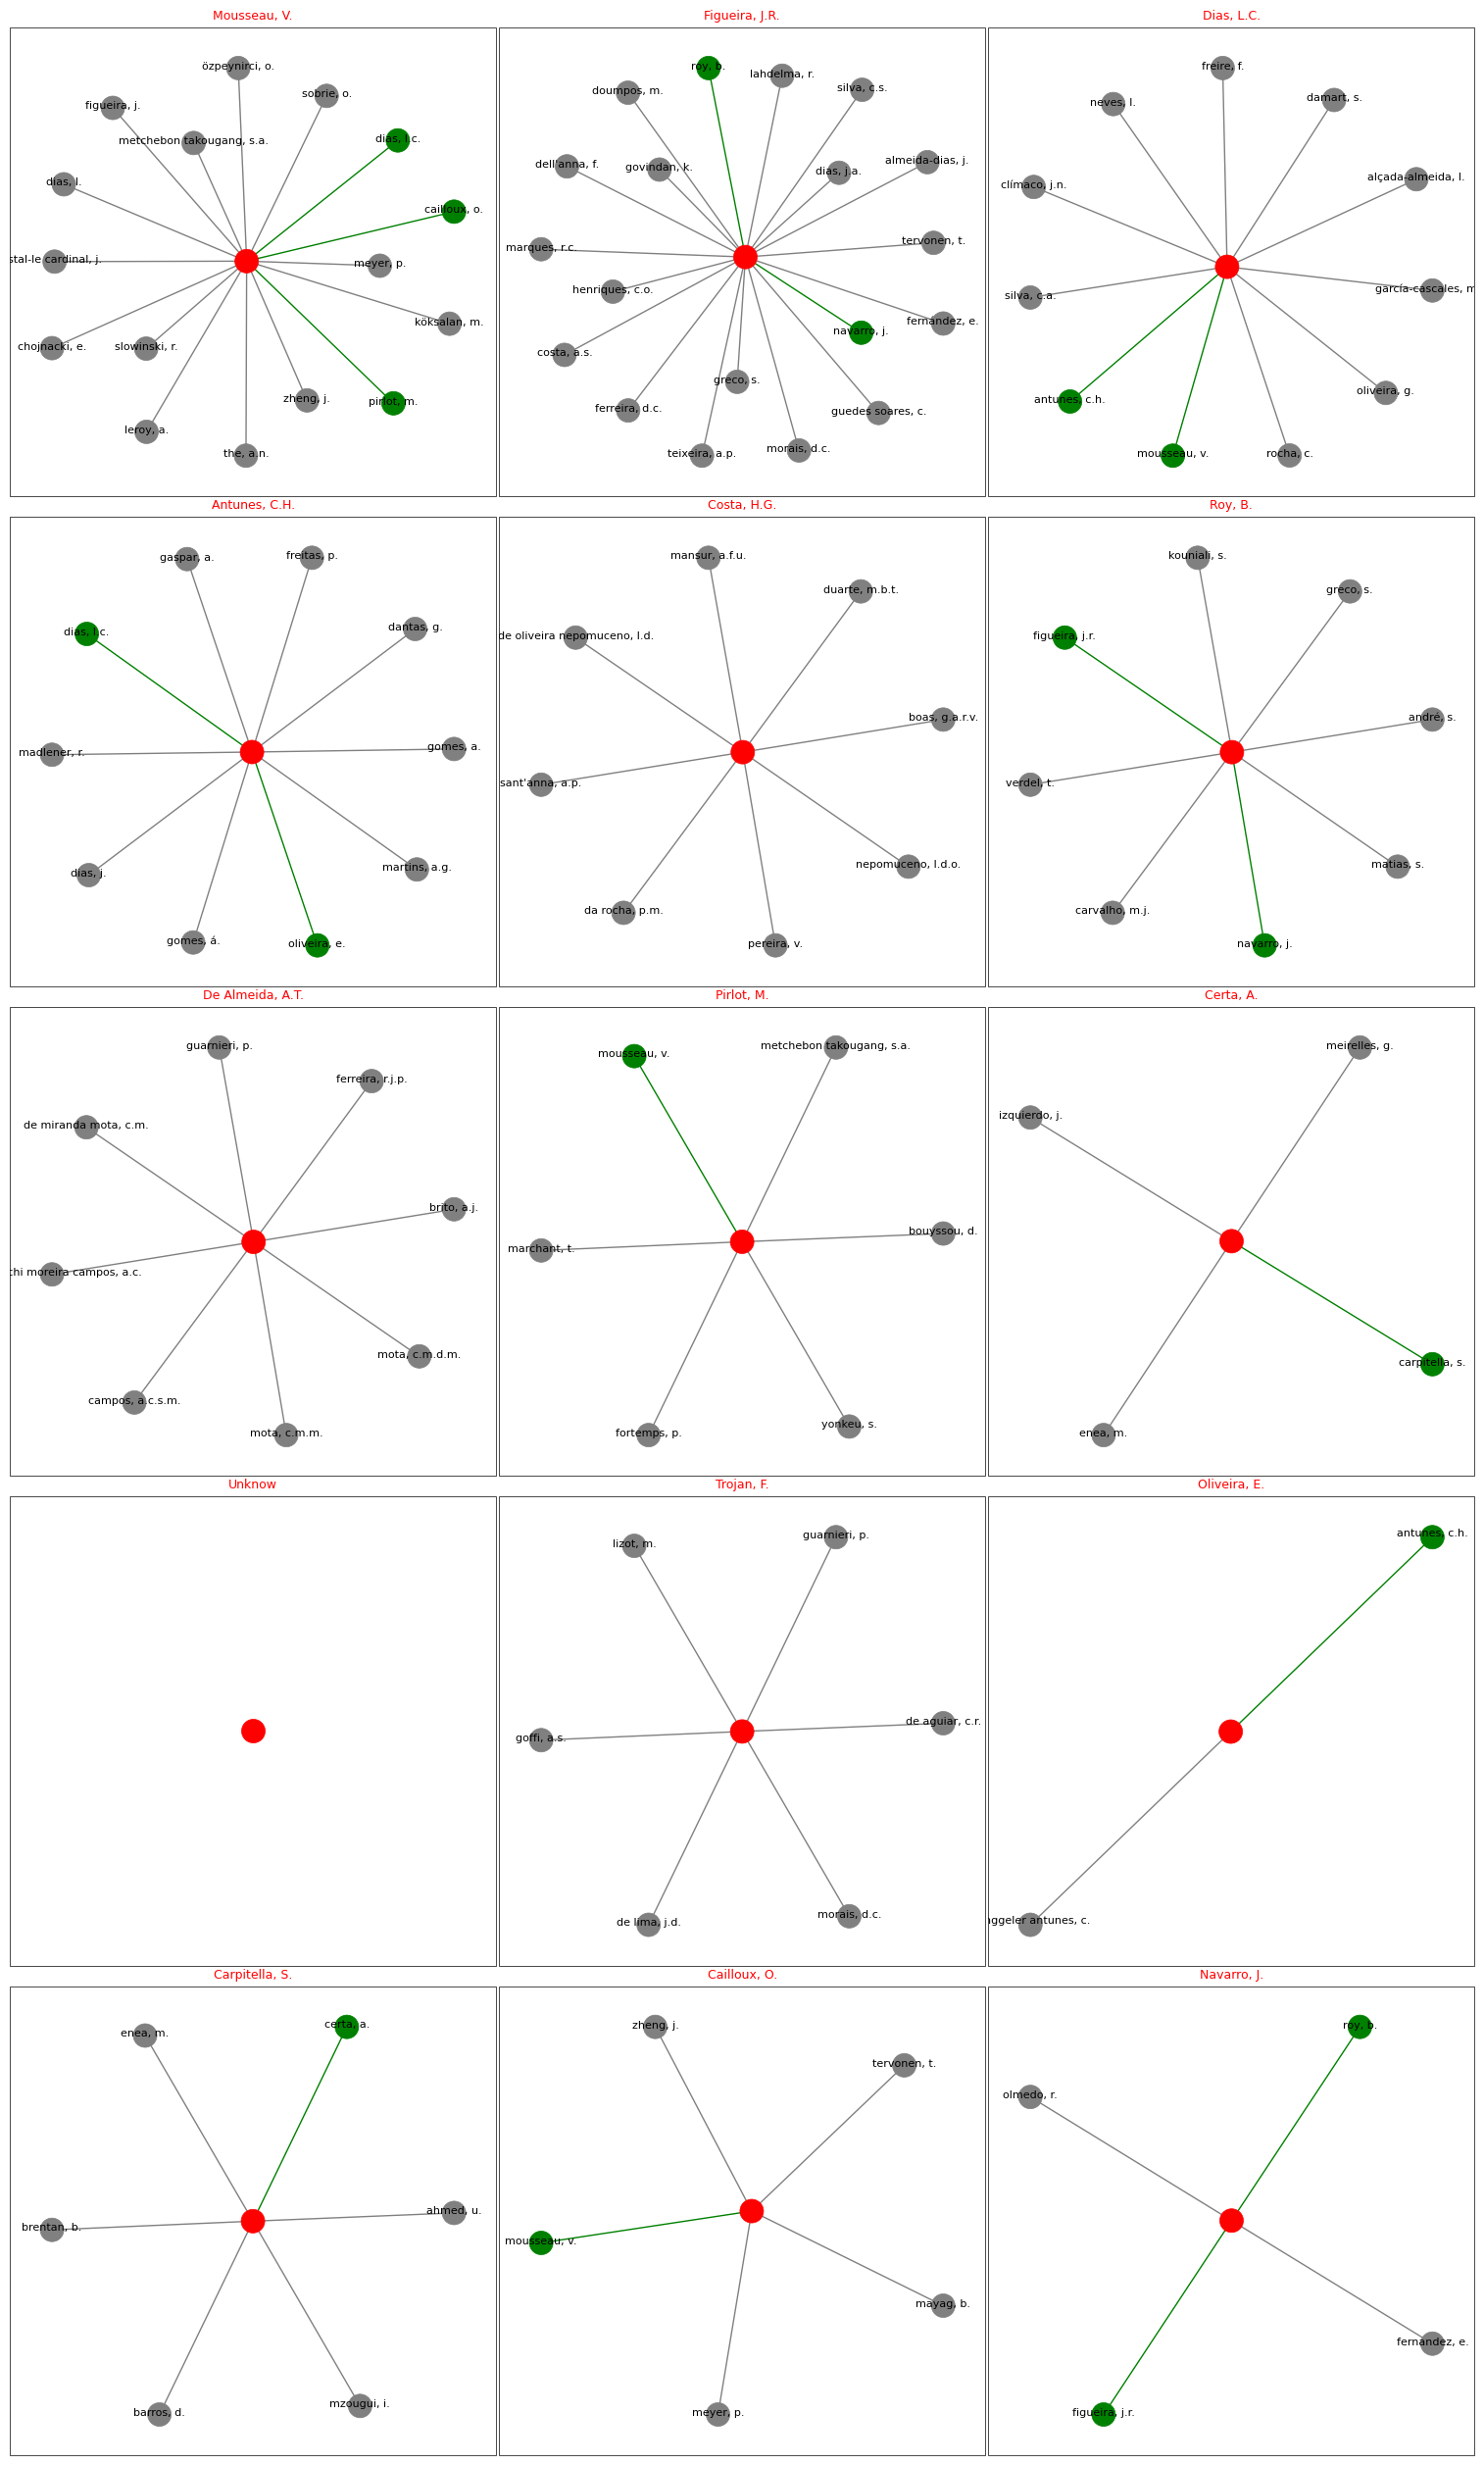

In [ ]:
# Arguments:
# entry      = 'aut', 'cout', 'inst', 'kwa', or 'kwp'.
# tgt        = List of specific names.
# topn       = Integer. Specifies the number of top authors to display based on their total contributions.
# rows       = Integer. Defines the number of rows in the subplot grid for the visual layout.
# cols       = Integer. Defines the number of columns in the subplot grid for the visual layout.
# wspace     = Float. Adjusts horizontal spacing between subplots.
# hspace     = Float. Adjusts vertical spacing between subplots.
# tspace     = Float. Sets additional vertical space between nodes and labels for better readability.
# node_size  = Integer. Controls the size of each node in the network graph.
# font_size  = Integer. Defines the font size for node labels.
# pad        = Float. Adjusts padding around the layout for a balanced appearance.
# nd_a       = Color string (e.g., '#FF0000'). Specifies the color for the primary node (main author).
# nd_b       = Color string (e.g., '#008000'). Specifies the color for secondary nodes (authors with significant links).
# nd_c       = Color string (e.g., '#808080'). Specifies the color for other nodes (authors with minor links).
# verbose    = Boolean. If True, prints details of each main node and its connections in the console; if False, suppresses this output.
bibfile.network_collab( entry     = 'aut',
                        tgt       = [],
                        topn      = 15,
                        rows      = 5,
                        cols      = 3,
                        wspace    = 0.2,
                        hspace    = 0.2,
                        tspace    = 0.01,
                        node_size = 300,
                        font_size = 8,
                        pad       = 0.2,
                        nd_a      = '#FF0000',
                        nd_b      = '#008000',
                        nd_c      = '#808080',
                        verbose   = False)

In [ ]:
# Gemini -  Network Collab Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_net_collab( char_limit = 27000,
                                          model      = 'gemini-1.5-flash',
                                          api_key    = 'your_api_key_here',
                                          query      = 'give me insights about the following information, the main nodes represent key entities, and the links indicate their direct connections or relationships')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 2278
This data represents a network of researchers, likely within a specific field (potentially operational research, decision science, or a related area given some of the names and potential connections).  The insights we can glean are:  **Collaboration
Networks:**  * **Central Figures:** Mousseau (V.), Figueira (J.R.), Dias (L.C.) are highly central nodes, suggesting they are prolific collaborators or leaders in their field.  They act as hubs connecting numerous other researchers. * **Clusters:**
We see the emergence of clusters or subgroups. For instance, Figueira's cluster suggests a strong Portuguese (or Iberian) research group.  Similarly, Mousseau appears to have a more internationally diverse network.  Antunes (C.H.) also seems to lead
a distinct cluster. * **Collaboration Strength:** The number of links to a node roughly indicates the extent of their collaboration.  Nodes with many links are key collaborators.  **Research Themes (Inferred):**  It's diffic

In [ ]:
# Network - Citation Analisys Between Documents (Blue Nodes) and Citations (Red Nodes).  (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_count   = Relationship between nodes that have been cited at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = Integer. Value for node size;
#            font_size   = Integer. Defines the font size for node labels;
#            local_nodes = True or False (True -> Only the blue will be displayed, False -> Red and Blue nodes will be displayed)
bibfile.network_adj_dir(view = 'notebook', min_count = 7, node_labels = True, node_size = 20, font_size = 10, local_nodes = False)

In [ ]:
# Gemini - Citation Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_citation( char_limit = 27000,
                                        model      = 'gemini-1.5-flash',
                                        api_key    = 'your_api_key_here',
                                        query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 2229
This data shows the citation counts for different papers (represented by `r_xxxxx`).  Several insights can be gleaned:  * **High Frequency Citations:**  Several papers (`r_5605`, `r_5689`, `r_5852`, `r_6825`, `r_6823`, `r_6640`, `r_6133`, `r_8429`,
`r_5655`, `r_5607`) are cited significantly more often than others. These are likely highly influential or seminal papers within the field.  * **Citation Clusters:**  There's a pattern of papers being cited together. For example, `r_5605` and
`r_6825` frequently appear together in the same citations, suggesting these works might be closely related or complementary.  Similarly, `r_5689` and `r_5852` often co-occur. This indicates potential research themes or closely linked methodologies.
* **Potential for Bibliometric Analysis:**  This data is ripe for more sophisticated analysis. Techniques like co-citation analysis could reveal clusters of papers and intellectual currents within a field.  Citation mapping could vi

In [ ]:
# Network - Local Documents (Only Blue Nodes) Citation History. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            min_links   = Relationship between nodes that have connected at least x times;
#            node_size   = Integer. Value for node size;
#            font_size   = Integer. Defines the font size for node labels;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            chain       = A list of documents. It shows the documents and their citations;
#            path       =  Only relevant if 'chain' is not empty. True -> Show only the documents in 'chain'. False -> Show documents and connections.
citations = bibfile.network_hist(view = 'notebook', min_links = 0, chain = [], path = False, node_size = 20, font_size = 10, node_labels = True)

In [ ]:
# Gemini - Citation History Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_hist( char_limit = 27000,
                                    model      = 'gemini-1.5-flash',
                                    api_key    = 'your_api_key_here',
                                    query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 5823
The provided data shows citation patterns between research papers, indicating relationships and knowledge flow within a research field.  Here are some insights:  * **Heavy Reliance on Older Papers:**  A significant number of citations point to papers
published before 2010, and even earlier. This suggests a strong foundation built on prior research and potentially indicates a mature field with established core concepts.  The persistent citation of these older papers could mean they represent
seminal work or fundamental methodologies.  * **Clustering Around Specific Years:**  There's a noticeable concentration of citations towards papers published in 2014, 2015, 2017, and 2019. This might reflect periods of significant advancements or
breakthroughs in the field, generating a wave of subsequent research building upon those findings.  * **Potential Research Clusters/Subfields:** The repeated citation of certain papers (e.g., papers 65, 73, 90, 203, etc.) hints at

In [ ]:
# Network - Collaboration Analysis Between Authors, Countries, Intitutions Or Adjacency Analysis Between Authors' Keywords or Keywords Plus. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            adj_type    = 'aut', 'cout', 'inst', 'kwa', or 'kwp'
#            min_count   = Relationship between nodes that have connected at least x times;
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            label_type  = 'id', 'name' (Only meaningfull if node_labels = True. 'id' -> The ID will be displayed; 'name' -> The name will be displayed);
#            centrality  = 'degree', 'load', 'betw', 'close', 'eigen', 'katz', 'harmonic', or None. Color nodes according to centrality criterion
#                          'degree'   = Degree Centrality
#                          'load'     = Load Centrality
#                          'betw'     = Betweenness Centrality
#                          'close'    = Closeness Centrality
#                          'eigen'    = Eigenvector Centrality
#                          'katz'     = Katz Centrality
#                          'harmonic' = Harmonic Centrality
#                           None      = The Community Algorithm, Girvan-Newman, will be used Instead of a Centrality Criterion
bibfile.network_adj(view = 'notebook', adj_type = 'aut', min_count = 5, node_labels = True, label_type = 'name', centrality = None)

# PS: If a centrality criterion is used then the values can be obtained by the following command:  bibfile.table_centr

In [ ]:
# Gemini - Collaboration Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_col_an(char_limit = 27000,
                                     model      = 'gemini-1.5-flash',
                                     api_key    = 'your_api_key_here',
                                     query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 8435
This data represents a network or co-authorship graph.  Let's break down the insights:  * **Nodes and Edges:** Each `ID` (e.g., `a_7`, `a_80`) represents a node, likely an author. The pairs of author IDs and their associated cluster values suggest an
edge between the authors. The cluster value likely indicates the strength or type of connection between the authors (e.g., co-authorship on a paper, collaboration on a project).  * **Cluster Values:** The consistent cluster values (0.0, 1.0, 2.0,
3.0) suggest a categorical or ordinal scale representing the relationship strength.  Higher values represent stronger connections.  `0.0` might indicate no direct collaboration, while higher values represent increasingly closer collaborations.  *
**Author a_24 and a_80 as Hubs:**  Author `a_24` has many connections, suggesting they are a highly collaborative author. Similarly, author `a_80` shows a high degree of connectivity with strong cluster values.  These authors co

In [ ]:
# Network - Similarity Analysis using coupling or cocitation methods. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            sim_type    = 'coup', 'cocit' ('coup' -> Coupling Method, 'cocit' -> Cocitation Method)
#            node_size   = -1. (If node_size = -1 then the default value will be used. If node_size > 0 then this new value will be used);
#            node_labels = True or False (True -> The label IDs will be displayed, False -> Only the nodes will be displayed );
#            cut_coup    = Cutoff value for Coupling Method. Only meaninfull if sim_type = 'coup';
#            cut_cocit   = Cutoff value for Cocitation Method. Only meaninfull if sim_type = 'cocit'
bibfile.network_sim(view = 'notebook', sim_type = 'cocit', node_size = 10, node_labels = True, cut_coup = 0.3, cut_cocit = 5)

In [ ]:
# Gemini - Similarity Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_sim( char_limit = 27000,
                                   model      = 'gemini-1.5-flash',
                                   api_key    = 'your_api_key_here',
                                   query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 1241
The data shows co-citation similarity scores between pairs of nodes (presumably papers) in a citation network.  Here are some insights:  * **High Similarity Scores:**  The highest similarity scores (12.0 and 22.0) suggest a strong relationship
between those paper pairs (43-79 and 230-231). This indicates these papers are frequently cited together, implying they likely address similar topics or contribute to the same research area.  Further investigation of these papers would be valuable.
* **Cluster Potential:** The presence of several papers with high similarity scores (e.g., multiple scores of 5.0, 6.0, and a few higher) suggests the potential existence of clusters or communities within the larger network.  These clusters represent
groups of papers focusing on related topics.  * **Potential Hubs:** Some papers appear more frequently than others (e.g., Paper ID 122, 125). These could be considered potential "hubs" within the network – central papers that are

In [ ]:
# Network - Collaboration Analysis Between Countries using a Map. (An interactive plot).
# Arguments: view        = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window);
#            connections = True or False (True -> Countries connections will be displayed, False -> Countries connections will not be displayed);
#            country_lst = Highlight the Connections Between a List of Countries
bibfile.network_adj_map(view = 'notebook', connections = True, country_lst = [])

In [ ]:
# Gemini - World Map Collaboration Analysis

# OBS 1: Requires the user to have an **API key** (https://ai.google.dev/gemini-api/)

# Arguments: char_limit  = Ensures that your request will remain within the Char Limit
#            api_key     = 'your_api_key_here'. Insert your personal API key (https://ai.google.dev/gemini-api/)
#            query       = Ask Gemini what you want to know
#            model       = Specifies the AI model used for text generation. The default value is "gemini-1.5-flash"
analysis = bibfile.ask_gemini_map(char_limit = 27000,
                                   model      = 'gemini-1.5-flash',
                                   api_key    = 'your_api_key_here',
                                   query      = 'give me insights about the following information')

# Gemini - Check Answer
print(textwrap.fill(analysis, 250))

Number of Characters: 2841
This data represents a collection of pairs of countries.  The insights we can glean depend on the context of where this data originated.  Without knowing the source, we can only make general observations:  **Overall Distribution:**  * **France as a
Central Hub:** France appears exceptionally frequently in the dataset, suggesting it may be a central point of interaction (trade, tourism, migration, etc.) for many of the other countries listed. * **European Clustering:**  A significant portion of
the pairs involve European countries.  There are strong connections between Italy, Portugal, Spain, Germany, and their neighbors. * **Regional Clusters:**  We see clusters beyond Europe, such as the connections between Brazil, Mexico, and Chile in
South America, and the connections between Morocco, Tunisia, and countries in Europe and the Middle East.  **Potential Interpretations (depending on data source):**  * **Trade Partnerships:** The data could represent bilateral